# SLE_SDY997_1_cluster

经过marker的鉴定，B cells,T cells,NK cells,macrophages注释正确

In [12]:
library(cowplot)
source(file.path('~/link/res_publish','func_r_map_seurat.r'))
item = 'SLE_SDY997'
p_root_item = file.path('.')
p_plot_item = file.path(p_root_item,'fig')
if(!dir.exists(p_plot_item)){
    dir.create(p_plot_item,recursive = TRUE)
}


> function----------------------------------------
serurat_to_mtx

> Map_Seurat function-----------------------------
Map_Seurat_normalize
Map_Seurat_cluster
Map_Seurat_mapquery
precess_after_Seurat
run_Seurat			[simply]

> other-------------------------------------------
get_path_varmap


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead.”


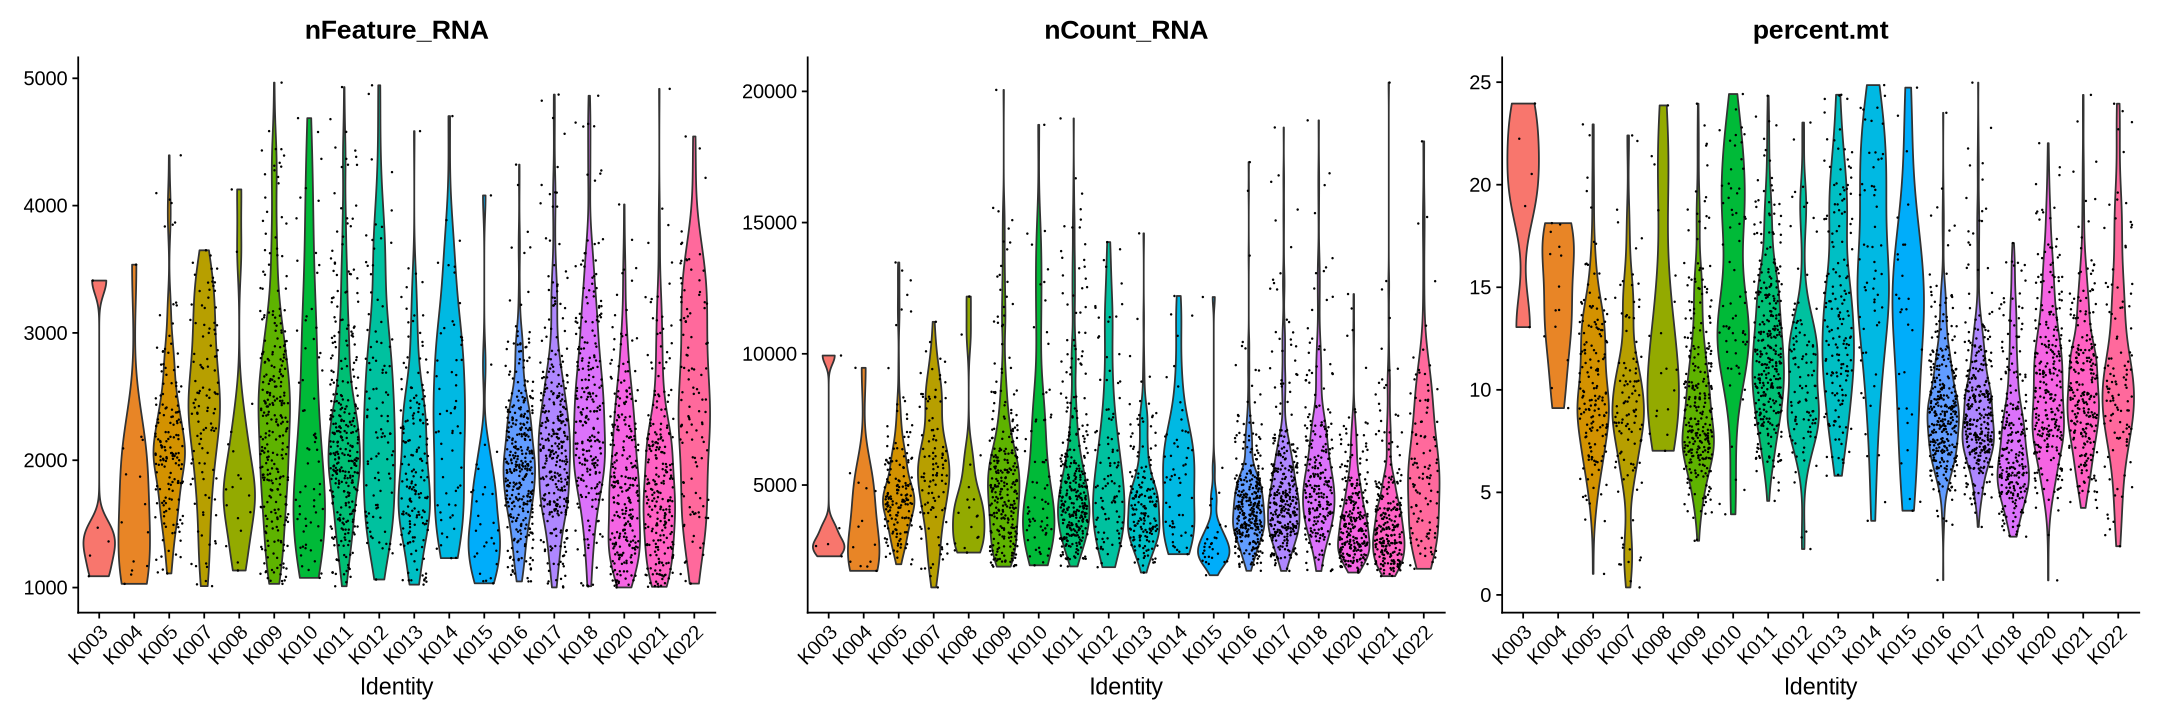

In [2]:
adata = load_seuratobj(file.path(p_cache,'disease','SLE_h_SDY997'))
adata[["percent.mt"]] = PercentageFeatureSet(adata, pattern = "^[Mm][Tt]-")
options(repr.plot.width = 3*6,repr.plot.height = 1*6)
VlnPlot(adata, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,status,disease,sample,cell_type,pre_sub_cell_type,pre_cell_type,pre_sub_cell_type_id,percent.mt
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
K003_L1Q1_A05,K003_L1Q1_A05,K003,2284,1089,Control_200-0608,healthy,Control,200-0608,Epithelial cells,Epithelial cells,Epithelial,CE0,22.24168
K003_L1Q1_A09,K003_L1Q1_A09,K003,2675,1251,Control_200-0608,healthy,Control,200-0608,Epithelial cells,Epithelial cells,Epithelial,CE0,20.52336


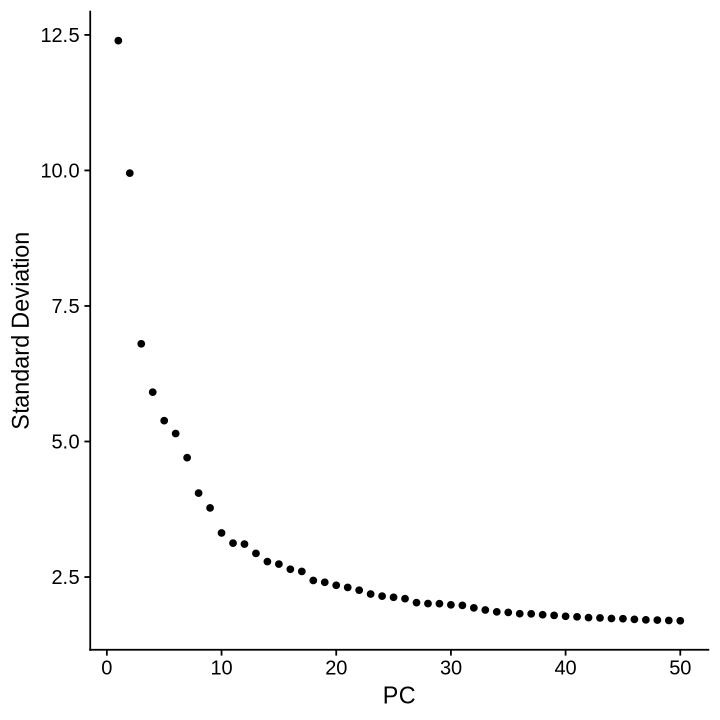

In [3]:
# 标准流程
adata@meta.data %>% head(2)
options(repr.plot.width = 1*6,repr.plot.height = 1*6)
adata = Map_Seurat_normalize(adata)

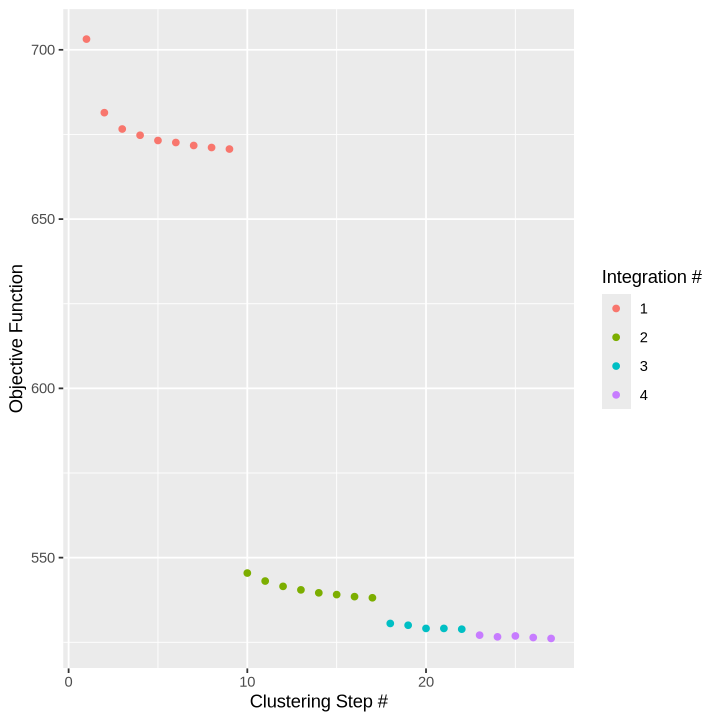

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


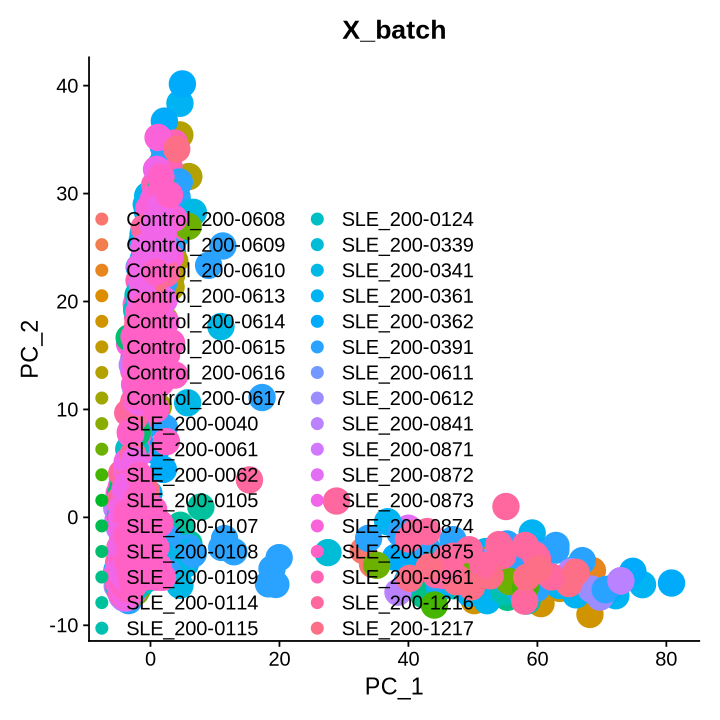

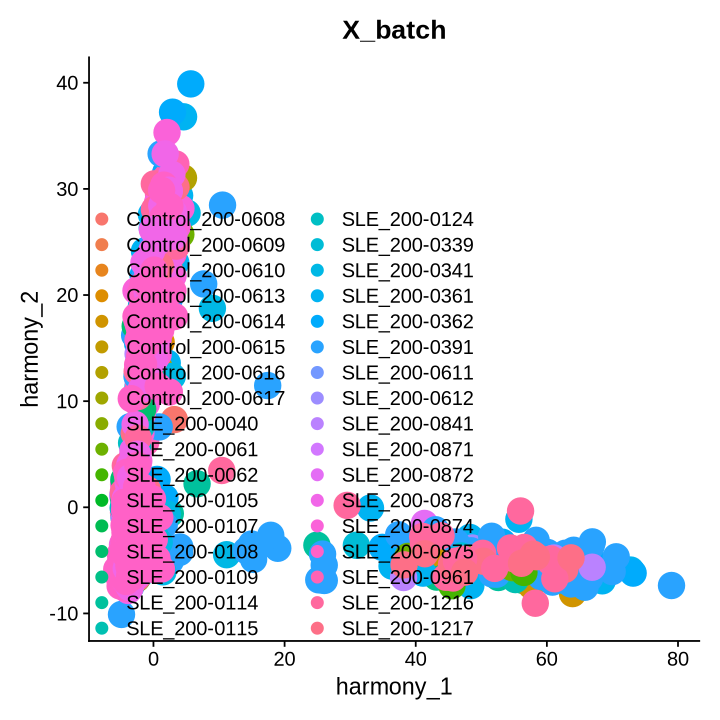

In [4]:
# function (adata, dims, resolution, key_batch, key_celltype = NULL, verbose = FALSE)
options(repr.plot.width = 1*6,repr.plot.height = 1*6)
adata = Map_Seurat_cluster_run_harmony(
    adata,dims=1:20,resolution = 0.1,
    key_batch = 'X_batch')

[out][plot] SLE_SDY997_harmony.png
	in ./fig


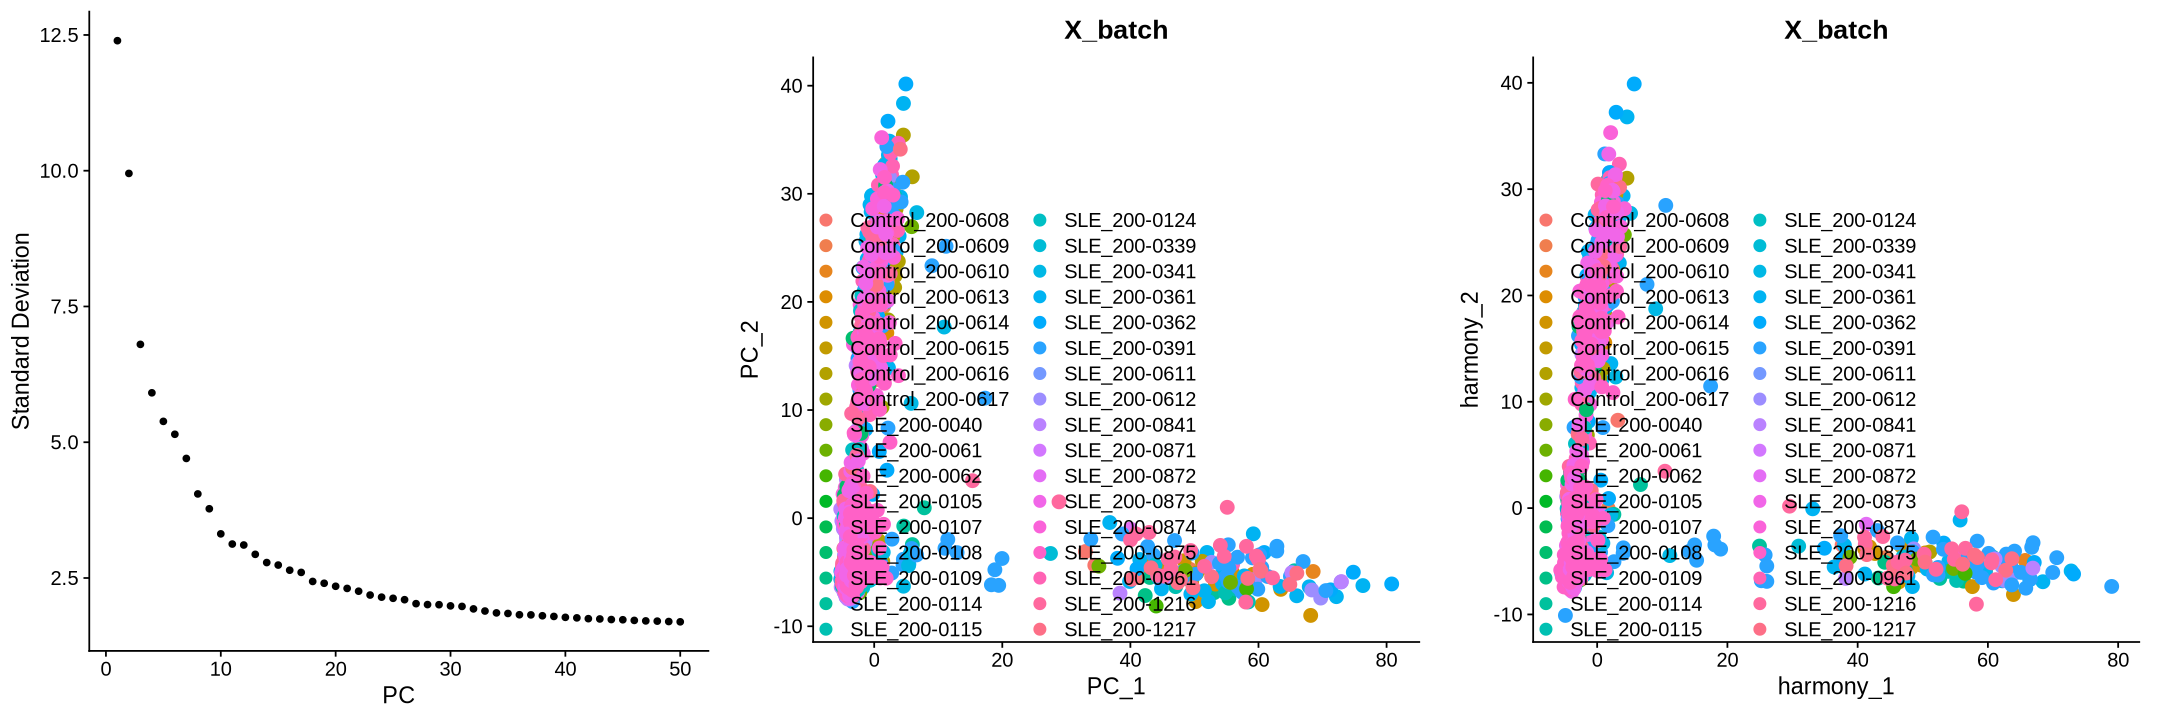

In [14]:
options(repr.plot.width = 6 * 3,repr.plot.height = 6)
p1 = ElbowPlot(adata,ndims = 50)
p2 =  DimPlot(object = adata, reduction = "pca",, group.by = 'X_batch',
        pt.size =1e4/nrow(adata@meta.data)) + them_legend
p3 = DimPlot(object = adata, reduction = "harmony",, group.by = 'X_batch',
        pt.size =1e4/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,nrow=1,ncol=3)
p
savefig(p,sprintf('%s_harmony.png',item),p_plot_item,width_ratio = 4*3)

,cell_name,orig.ident,nCount_RNA,nFeature_RNA,X_batch,status,disease,sample,cell_type,pre_sub_cell_type,pre_cell_type,pre_sub_cell_type_id,percent.mt,RNA_snn_res.0.1,seurat_clusters
,<chr>,<fct>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<fct>,<fct>
K003_L1Q1_A05,K003_L1Q1_A05,K003,2284,1089,Control_200-0608,healthy,Control,200-0608,Epithelial cells,Epithelial cells,Epithelial,CE0,22.24168,4,4
K003_L1Q1_A09,K003_L1Q1_A09,K003,2675,1251,Control_200-0608,healthy,Control,200-0608,Epithelial cells,Epithelial cells,Epithelial,CE0,20.52336,4,4


[out][plot] SLE_SDY997_umap_cluster.png
	in ./fig


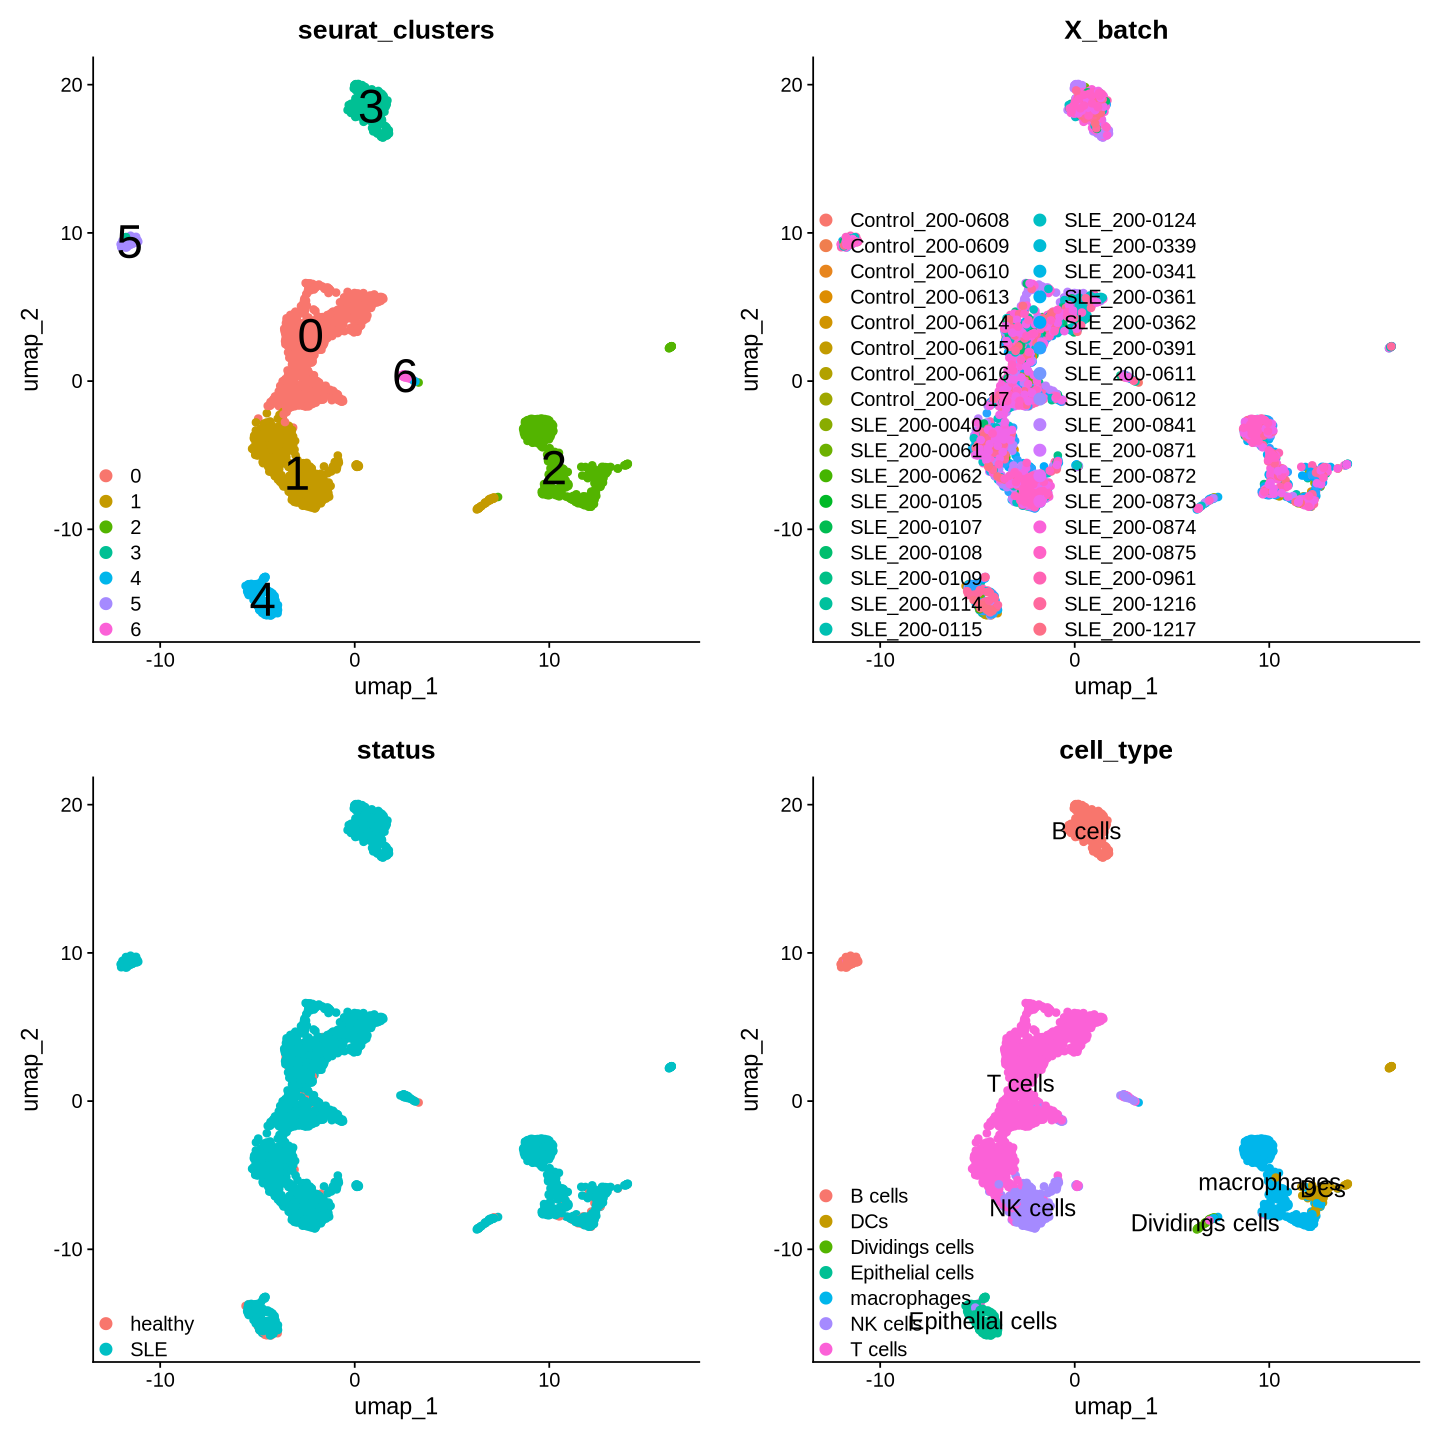

In [15]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 2*6)
adata@meta.data %>% head(2)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =5e3/nrow(adata@meta.data)) + them_legend
p2 = UMAPPlot(adata,group.by='X_batch',pt.size =5e3/nrow(adata@meta.data)) + them_legend
p3 = UMAPPlot(adata,group.by='status',pt.size =5e3/nrow(adata@meta.data)) + them_legend
p4 = UMAPPlot(adata,group.by='cell_type',label =TRUE,label.size=5,
              pt.size =5e3/nrow(adata@meta.data)) + them_legend
p=cowplot::plot_grid(p1,p2,p3,p4,nrow=2,ncol=2)
p
savefig(p,sprintf('%s_umap_cluster.png',item),p_plot_item,
        width_ratio = 2*4,height_ratio = 2*4)

# markers_cell_type

In [7]:
if(file.exists(file.path(p_root_item,'markers_cell_type.csv'))){
    cat(sprintf('[read] markers_cell_type.csv\n'))
    markers = read_csv(file.path(p_root_item,'markers_cell_type.csv'))
}else{
    markers = list()
    for(temp in  unique(adata@meta.data$cell_type)){
        cat(sprintf('[find marker] %s\n',temp))
        markers[[temp]] = FindMarkers(adata,group.by ='cell_type',ident.1=temp)
        markers[[temp]] = markers[[temp]] %>% mutate(group = temp,
                                   gene = rownames(markers[[temp]]),.before = 1)
    }
    cat(sprintf('[merge marker] %s\n',temp))
    markers = bind_rows(markers)
    markers %>% write_csv(file.path(p_root_item,'markers_cell_type.csv'))
    cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_cell_type.csv')))
}
markers = markers %>% select(gene,group,avg_log2FC,pct.1,pct.2,p_val_adj) %>%
filter(p_val_adj < 0.05 ,avg_log2FC > 1,pct.1 > 0.5) %>% 
arrange(group,desc(avg_log2FC)) %>% mutate(
    group = as.character(group)
)
markers %>% head(2)
paste(unique(markers$group),collapse = ',')

[read] markers_cell_type.csv


Rows: 92208 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): group, gene
dbl (5): p_val, avg_log2FC, pct.1, pct.2, p_val_adj

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


gene,group,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CD19,B cells,7.867481,0.658,0.006,0
FCRL5,B cells,7.478679,0.670,0.014,0


[1] "B cells,DCs,Dividings cells,Epithelial cells,NK cells,T cells,macrophages"

In [8]:
# [marker identify] B cells,T cells,NK cells,macrophages
# [?] DCs,Dividings cells,Epithelial cells
q_group = 'T cells'
markers %>% filter(group == q_group) %>% head(20) %>% arrange(desc(pct.1))

gene,group,avg_log2FC,pct.1,pct.2,p_val_adj
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
TRAC,T cells,3.978912,0.928,0.259,0.000000e+00
CD2,T cells,3.059184,0.907,0.241,0.000000e+00
TRBC2,T cells,2.701518,0.899,0.457,8.523322e-230
CD3E,T cells,3.820055,0.868,0.116,0.000000e+00
IL32,T cells,2.259009,0.819,0.238,1.114183e-207
BCL11B,T cells,2.765259,0.813,0.221,1.865917e-240
CD3G,T cells,3.418839,0.794,0.101,4.075941e-290
SPOCK2,T cells,2.850447,0.746,0.218,1.662088e-201
CD3D,T cells,3.660063,0.740,0.074,3.578610e-275


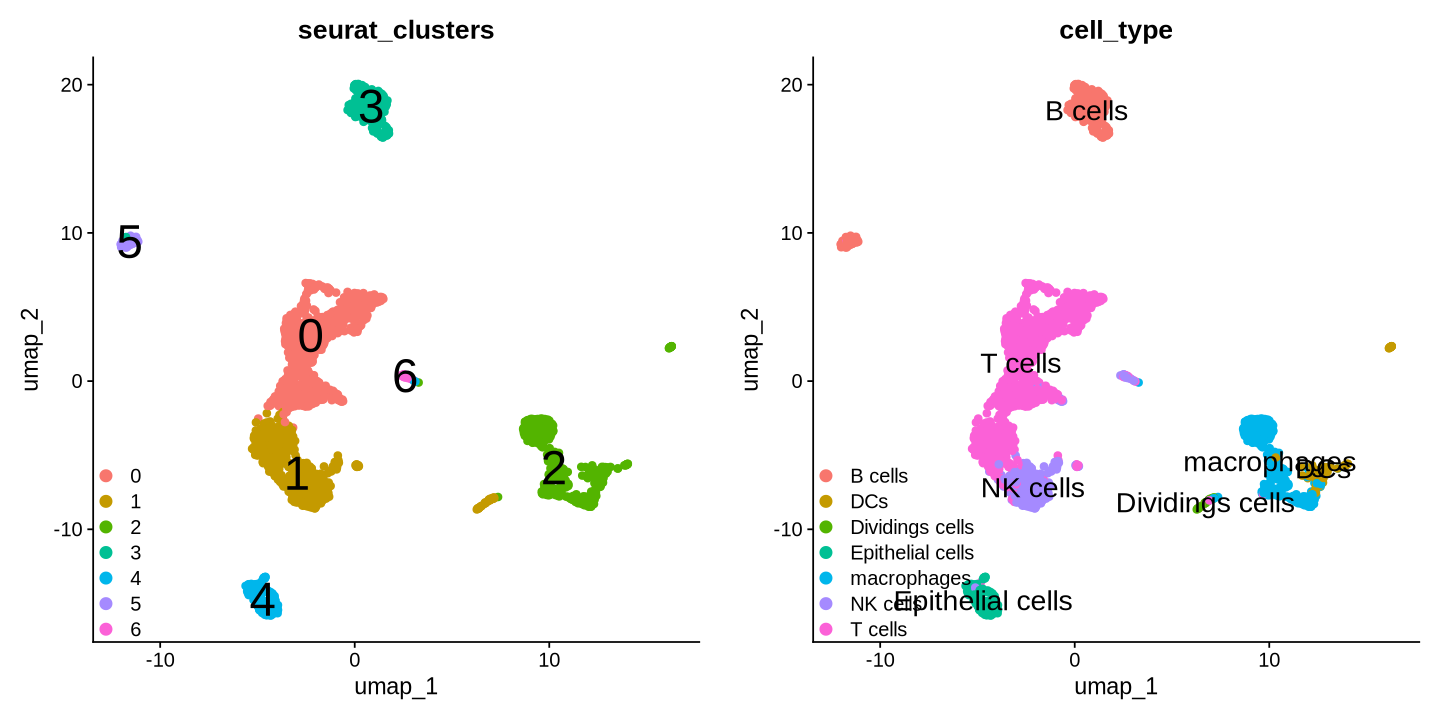

[out][plot] SLE_SDY997_markers.png
	in ./fig


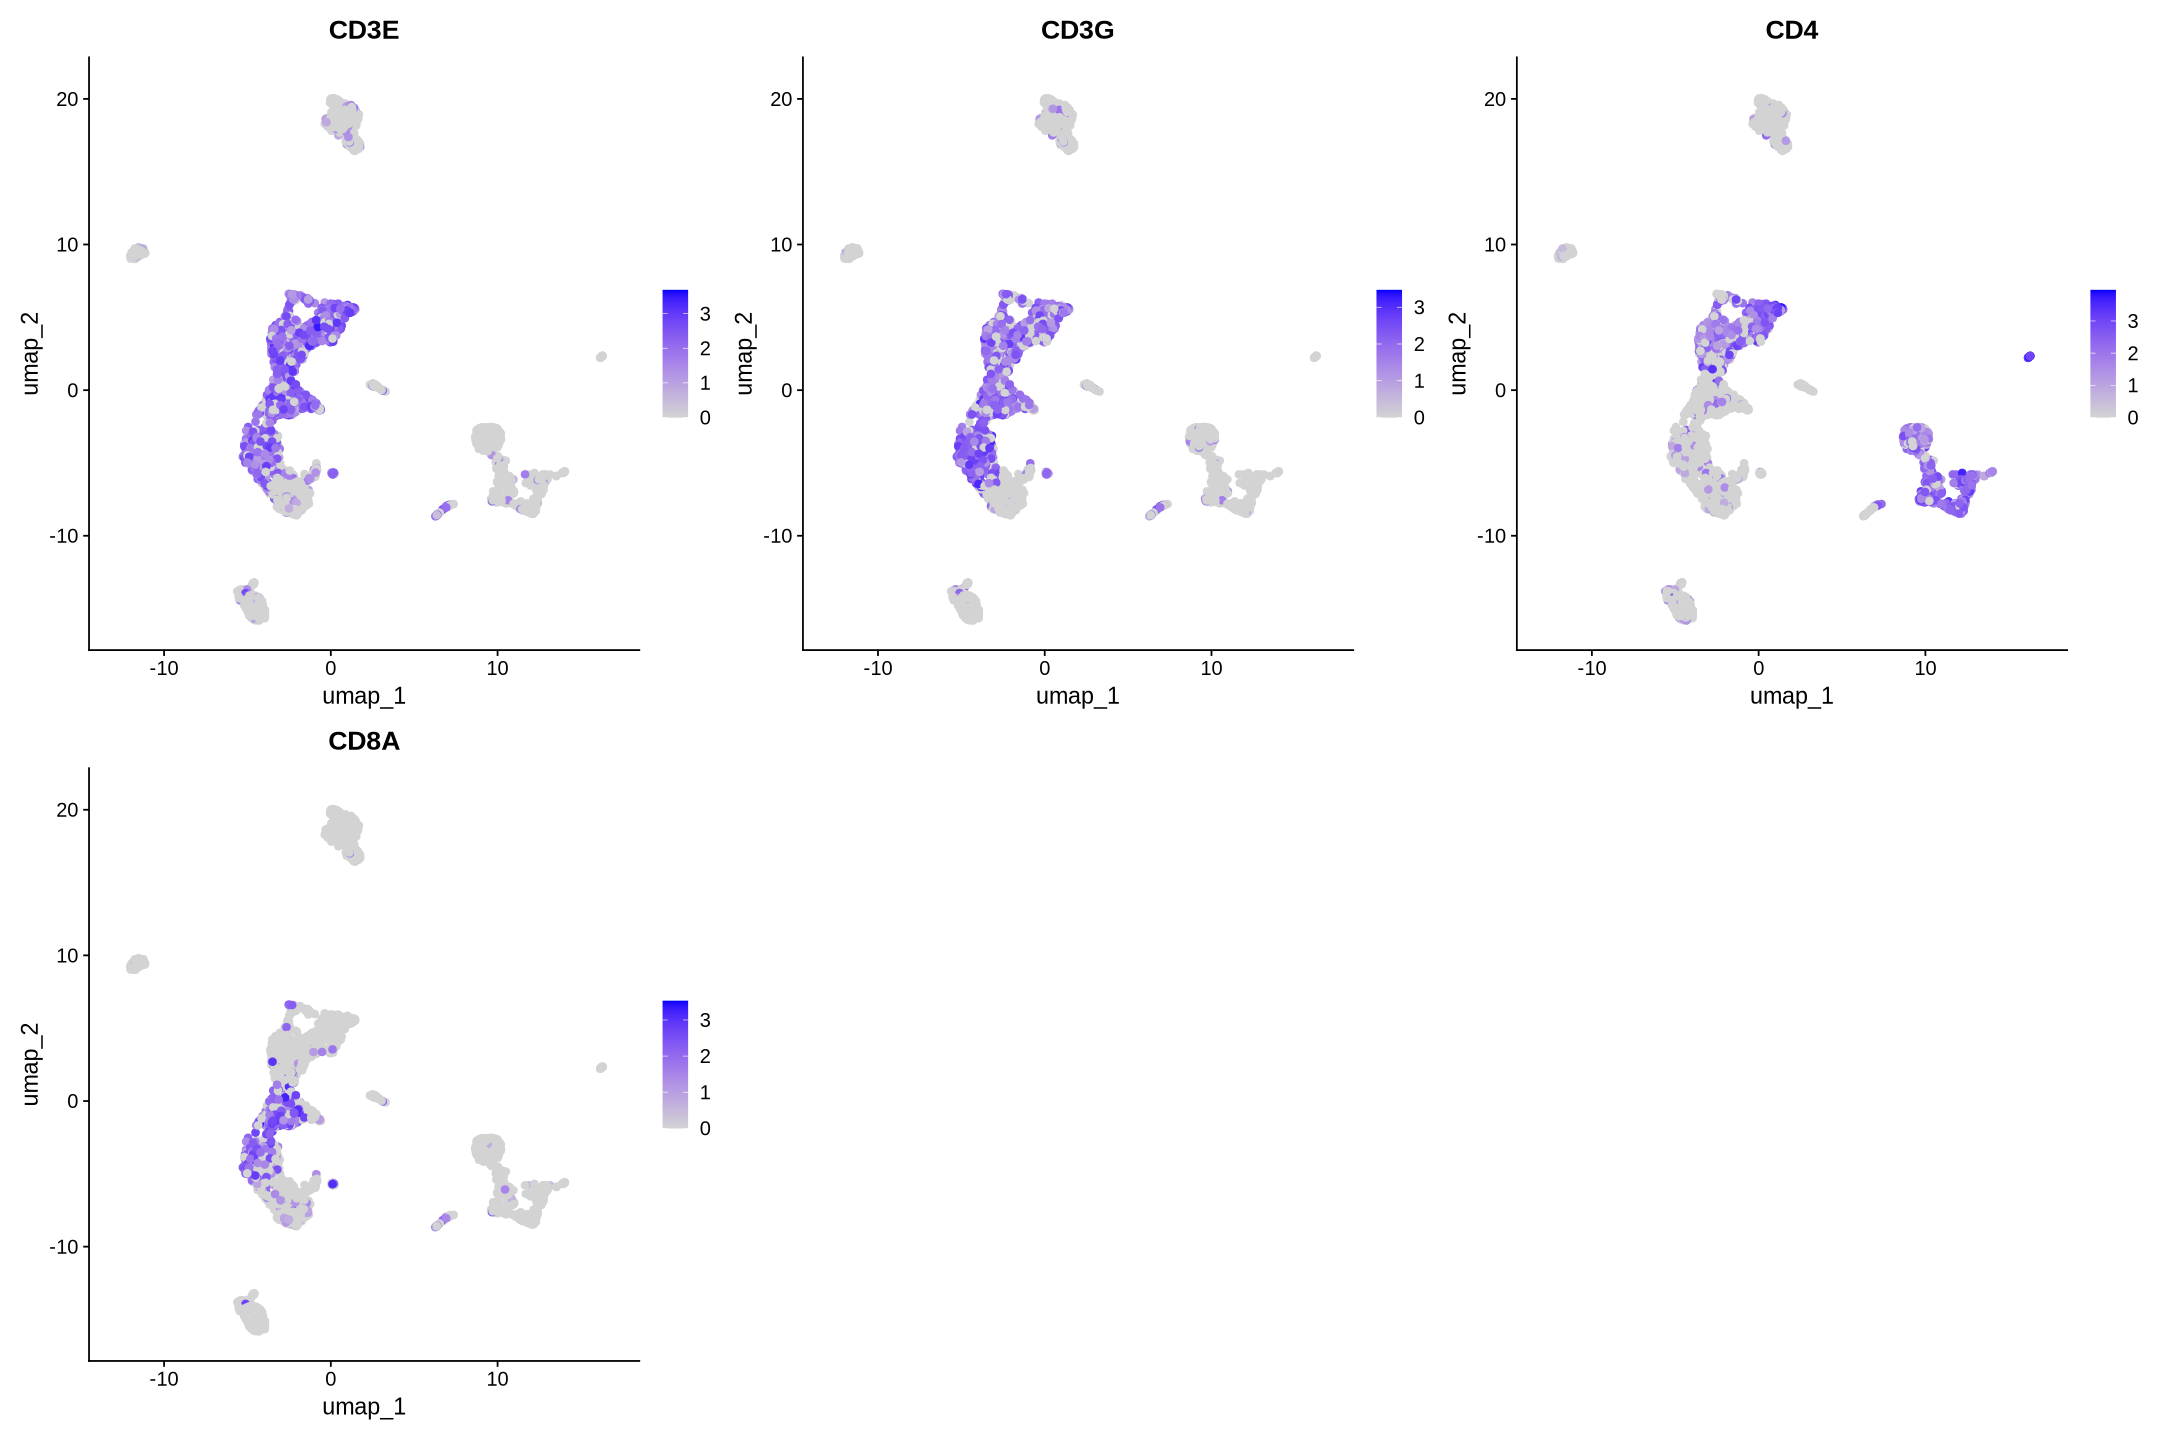

In [16]:
# adata <- adata  %>% FindClusters(resolution = 0.2, verbose = FALSE)
options(repr.plot.width = 2*6,repr.plot.height = 1*6)
p1 = UMAPPlot(adata,group.by='seurat_clusters',label =TRUE,label.size=10,
              pt.size =5e3/nrow(adata@meta.data)) + them_legend
p2 = UMAPPlot(adata,group.by='cell_type',label =TRUE,label.size=6,
              pt.size =5e3/nrow(adata@meta.data)) + them_legend
cowplot::plot_grid(p1,p2,nrow=1,ncol=2)

tbl_marker <- bind_rows(
  tibble(
    'cell_type' = 'T cells',
    'gene' = str_split('CD3E,CD3G,CD4,CD8A', ',')[[1]]
),tibble(
    'cell_type' = 'B cells',
      'gene' = str_split('CD19,CD79A,CD79B', ',')[[1]]
),tibble(
    'cell_type' = 'NK cells',
      'gene' = str_split('NKG7,GNLY,KLRD1', ',')[[1]]
),tibble(
    'cell_type' = 'macrophages',
      'gene' = str_split('MS4A7,CD68,CSF1R', ',')[[1]]
))
genes <- filter(tbl_marker, cell_type == 'T cells')$gene
options(repr.plot.width = 3 * 6, repr.plot.height =
  6 * ifelse(length(genes) %% 3 == 0, floor(length(genes) %/% 3), floor(length(genes) %/% 3) + 1))
p = FeaturePlot(adata, features = genes, ncol = 3,
  pt.size = 5e3 / nrow(adata@meta.data)
)
p
savefig(p,sprintf('%s_markers.png',item),p_plot_item,
        width_ratio = 4*3,
        height_ratio =4 * ifelse(length(genes) %% 3 == 0, floor(length(genes) %/% 3), floor(length(genes) %/% 3) + 1))
# tbl_marker %>% write_csv(file.path(p_root_item,'markers_plot.csv'))
# cat(sprintf('[out] %s\n',file.path(p_root_item,'markers_plot.csv')))